# Identify how fast OS packages respond to security vulnerabilities - Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read in full report data 

In [2]:
full_data_path = "../GitOperations/data/report.csv"
full_data = pd.read_csv(full_data_path, index_col = 0)

In [3]:
full_data.head(20)

,Package,Vulnerability,OS,Package_Version
index,,,,
0,tar,CVE-2018-20482,alpine:v3.6,1.31-r0
1,tar,CVE-2016-6321,alpine:v3.6,1.29-r1
2,tar,CVE-2016-6321,alpine:v3.7,1.29-r1
3,tar,CVE-2018-20482,alpine:v3.7,1.31-r0
4,tar,CVE-2016-6321,alpine:v3.8,1.29-r1
5,tar,CVE-2018-20482,alpine:v3.8,1.31-r0
6,tar,CVE-2016-6321,alpine:v3.4,1.29-r1
7,tar,CVE-2018-20482,alpine:v3.10,1.31-r0
8,tar,CVE-2016-6321,alpine:v3.10,1.29-r1


## Distribution of packages in the full data

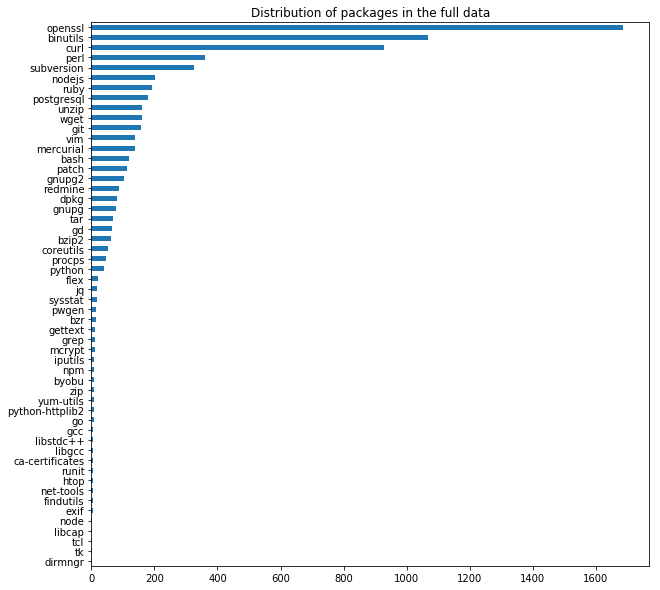

In [7]:
plt.figure(figsize=(10,10))
full_data.Package.value_counts()[::-1].plot('barh', 
                                             title="Distribution of packages in the full data")
plt.savefig("outputs/Distribution_of_packages_in_the_full_data.png")

plt.show()

## Full data contained duplicate vulnerabilities 

In [8]:
full_data[full_data[['Package', 'Vulnerability', 'Package_Version']].duplicated()].head(20)

,Package,Vulnerability,OS,Package_Version
index,,,,
2,tar,CVE-2016-6321,alpine:v3.7,1.29-r1
3,tar,CVE-2018-20482,alpine:v3.7,1.31-r0
4,tar,CVE-2016-6321,alpine:v3.8,1.29-r1
5,tar,CVE-2018-20482,alpine:v3.8,1.31-r0
6,tar,CVE-2016-6321,alpine:v3.4,1.29-r1
7,tar,CVE-2018-20482,alpine:v3.10,1.31-r0
8,tar,CVE-2016-6321,alpine:v3.10,1.29-r1
9,tar,CVE-2018-20482,alpine:v3.9,1.31-r0
10,tar,CVE-2016-6321,alpine:v3.9,1.29-r1


## Reading the de-duplicated data 

In [9]:
data_path = "../GitOperations/data/Final_Report.csv"

In [10]:
data = pd.read_csv(data_path)
columns = ['Package', 'Vulnerability', 'OS', 'Package_Version', 'OS_base_name', 
           'Date_Reported', 'Date_Fixed', 'Days_For_Fix']
data = data[columns]

In [11]:
data.head(7)

,Package,Vulnerability,OS,Package_Version,OS_base_name,Date_Reported,Date_Fixed,Days_For_Fix
0,tar,CVE-2018-20482,alpine:v3.6,1.31-r0,alpine,2018-12-26,NaN,NaN
1,tar,CVE-2016-6321,alpine:v3.6,1.29-r1,alpine,2016-10-27,NaN,NaN
2,tar,CVE-2019-9923,debian:8,#MAXV#,debian,2019-01-02,NaN,NaN
3,tar,CVE-2007-4131,debian:8,1.18-2,debian,2007-08-13,NaN,NaN
4,tar,CVE-2007-4476,debian:8,1.18-1,debian,2007-08-13,NaN,NaN
5,tar,CVE-2010-0624,debian:8,1.23-1,debian,2005-12-23,2011-09-13,2090.0
6,tar,CVE-2005-2541,debian:8,#MAXV#,debian,2005-08-04,NaN,NaN


Our script is able to get dates when a vulnerability is reported using the XForce API. We scrape data for the date when a vulnerability is fixed. 

In [12]:
data.shape

(1406, 8)

There are 54 packages to be tracked

In [13]:
len(data.Package.unique())

54

Some of the packages can be seen here:

In [14]:
data.Package.unique()

array(['tar', 'redmine', 'python', 'yum-utils', 'vim', 'perl',
       'coreutils', 'nodejs', 'zip', 'libcap', 'tcl', 'subversion',
       'byobu', 'dpkg', 'libstdc++', 'unzip', 'npm', 'openssl', 'node',
       'gnupg2', 'ca-certificates', 'python-httplib2', 'git', 'binutils',
       'procps', 'iputils', 'jq', 'gcc', 'htop', 'wget', 'gnupg',
       'mcrypt', 'gd', 'postgresql', 'pwgen', 'gettext', 'findutils',
       'patch', 'bzip2', 'flex', 'dirmngr', 'go', 'ruby', 'exif',
       'net-tools', 'curl', 'grep', 'libgcc', 'bzr', 'runit', 'mercurial',
       'sysstat', 'bash', 'tk'], dtype=object)

## Distribution of Packages in the cleaned data

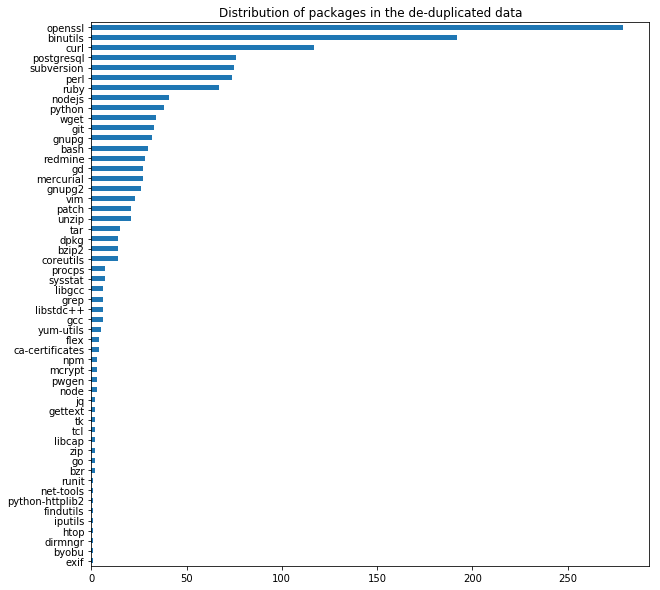

In [15]:
plt.figure(figsize=(10,10))
data.Package.value_counts()[::-1].plot('barh',
                                       title="Distribution of packages in the de-duplicated data")
plt.savefig("outputs/Distribution_of_packages_in_the_dedup_data.png")

plt.show()

## Distribution of OS in the cleaned data

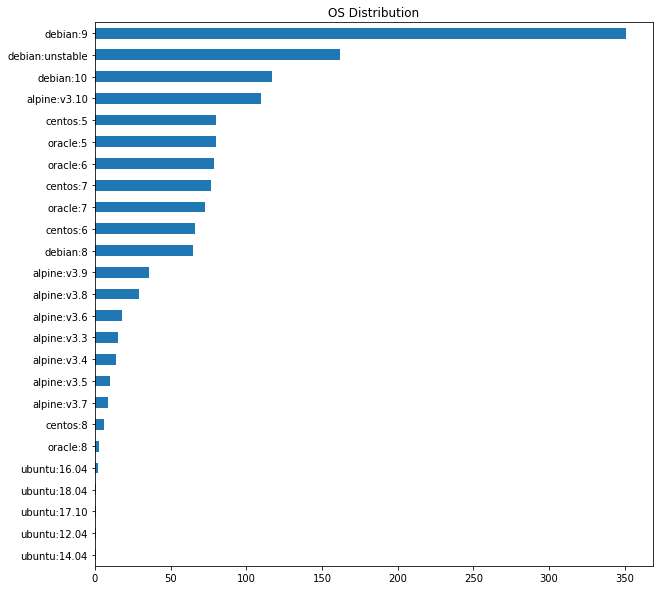

In [16]:
plt.figure(figsize=(10,10))
data.OS.value_counts()[::-1].plot('barh', 
                             title="OS Distribution")
plt.savefig("outputs/OS_Distribution")

plt.show()

In [17]:
data['OS_base_name'].value_counts('norm')

debian    0.494310
alpine    0.171408
oracle    0.167141
centos    0.162873
ubuntu    0.004267
Name: OS_base_name, dtype: float64

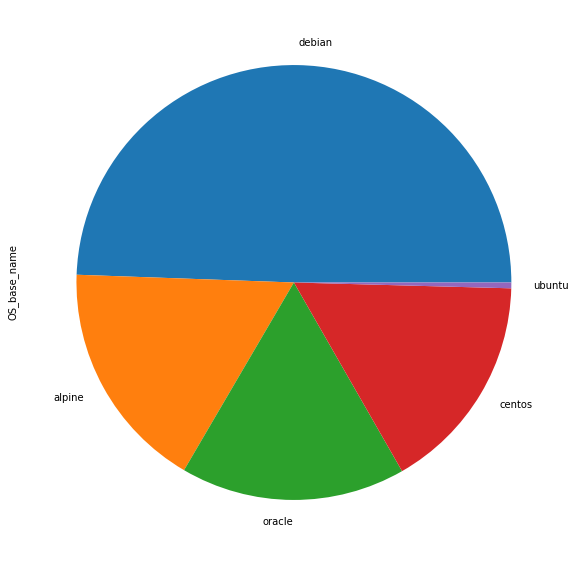

In [18]:
plt.figure(figsize=(10,10))
data['OS_base_name'].value_counts('norm').plot('pie')

## Analyzing how long it takes for vulnerabilities to be fixed

In [19]:
day_fixed_df = data[~data['Days_For_Fix'].isnull()]
day_fixed_df.shape

(121, 8)

In [20]:
day_fixed_df.sort_values('Days_For_Fix', ascending=False, inplace=True)

In [21]:
day_fixed_df.head()

,Package,Vulnerability,OS,Package_Version,OS_base_name,Date_Reported,Date_Fixed,Days_For_Fix
985,mcrypt,CVE-2012-4527,debian:unstable,2.6.8-1.3,debian,2012-10-18,2018-12-12,2246.0
5,tar,CVE-2010-0624,debian:8,1.23-1,debian,2005-12-23,2011-09-13,2090.0
1386,bash,CVE-2012-6711,debian:8,4.3-1,debian,2019-06-17,2014-03-05,1930.0
350,unzip,CVE-2018-18384,debian:10,6.0-11,debian,2018-10-16,2014-04-30,1630.0
188,coreutils,CVE-2017-2616,debian:unstable,8.20-1,debian,2017-03-21,2012-11-18,1584.0


## Debian and Ubuntu are the Operating systems we analyzed

In [22]:
data['OS_base_name'].unique()

array(['alpine', 'debian', 'oracle', 'centos', 'ubuntu'], dtype=object)

In [23]:
data.groupby('OS_base_name').sum().sort_values('Days_For_Fix', ascending=False)

,Days_For_Fix
OS_base_name,
debian,30362.0
ubuntu,267.0
alpine,0.0
centos,0.0
oracle,0.0


<Figure size 720x720 with 0 Axes>

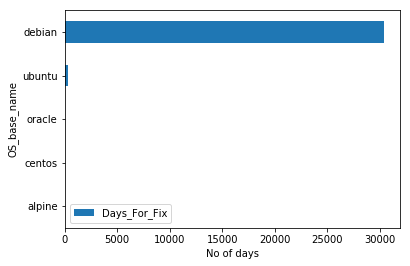

In [24]:
plt.figure(figsize=(10,10))
ax = data.groupby('OS_base_name').sum().sort_values('Days_For_Fix', ascending=True).plot(kind='barh')
ax.set(xlabel = 'No of days')
plt.show()

## Histograms to demonstrate how much time it takes for a fix

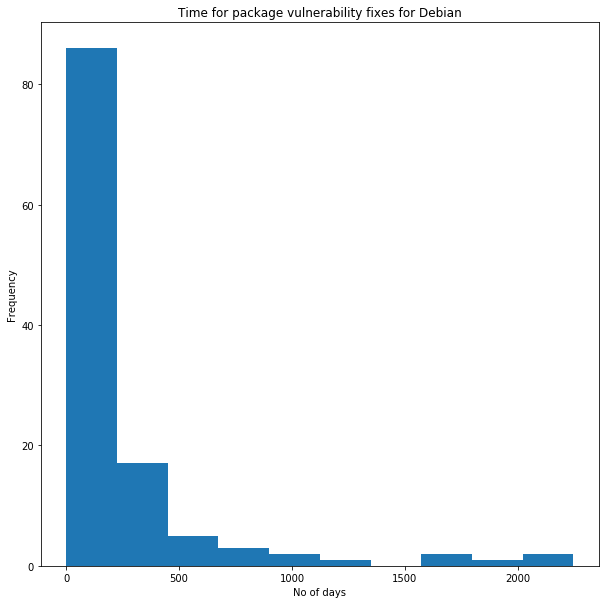

In [25]:
plt.figure(figsize=(10,10))
ax = day_fixed_df['Days_For_Fix'][day_fixed_df['OS_base_name']=='debian'].plot('hist',
                                                                          title="Time for package vulnerability fixes for Debian")
ax.set(xlabel = 'No of days')

plt.savefig("outputs/Debian_Vulnerability_Fixes.png")

plt.show()

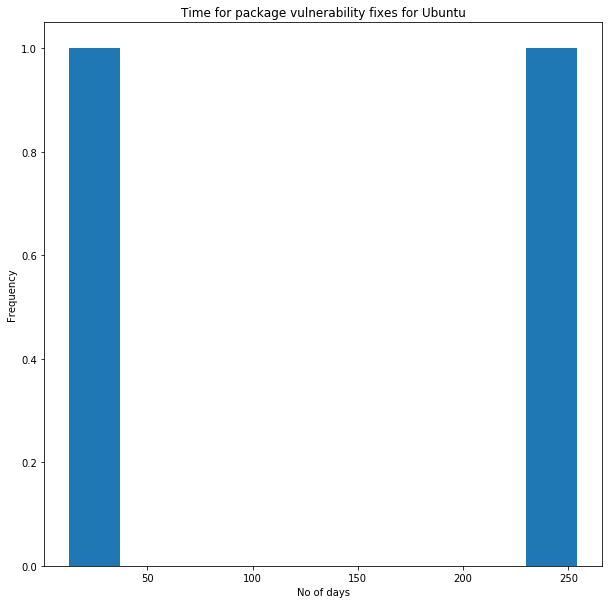

In [26]:
plt.figure(figsize=(10,10))
ax = day_fixed_df['Days_For_Fix'][day_fixed_df['OS_base_name']=='ubuntu'].plot('hist',
                                                                          title="Time for package vulnerability fixes for Ubuntu")
ax.set(xlabel = 'No of days')

plt.savefig("outputs/Ubuntu_Vulnerability_Fixes.png")

plt.show()

In [27]:
debian_info = data[data['OS_base_name']=='debian']
print("For Debian:")
print(len(debian_info[~debian_info['Date_Reported'].isnull()]), "vulnerabilities were reported")
print(len(debian_info[~debian_info['Date_Fixed'].isnull()]), "vulnerabilities were fixed")

For Debian:
687 vulnerabilities were reported
120 vulnerabilities were fixed


120 vulnerabilities out of 686 reported vulnerabilities were fixed. Rest are still unifixed.

In [28]:
ubuntu_info = data[data['OS_base_name']=='ubuntu']
print("For Ubuntu:")
print(len(ubuntu_info[~ubuntu_info['Date_Reported'].isnull()]), "vulnerabilities were reported")
print(len(ubuntu_info[~ubuntu_info['Date_Fixed'].isnull()]), "vulnerabilities were fixed")

For Ubuntu:
6 vulnerabilities were reported
2 vulnerabilities were fixed


__________